In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.linear_model import LinearRegression

import netCDF4 as nc

from tools import MyNetCDF, Preprocessing
from models import Fitter
import netCDF4 as nc

In [2]:
# loading data
process = Preprocessing()
ds_train = process.load_csv(filepath = 'data/model/data_daily-16.csv', continuous_check=True)
ds_test = process.load_csv(filepath = 'data/model/data_daily-17.csv', continuous_check=True)

target_var = 'iceconc'
ice_var_list = ['ice_volume', 'iceconc', 'icethic_cea', 'siconcat','sithicat', 'snowthic_cea']
model_var_list = ['sossheig','votemper','vosaline']

Found 0 gaps
Found 2 gaps


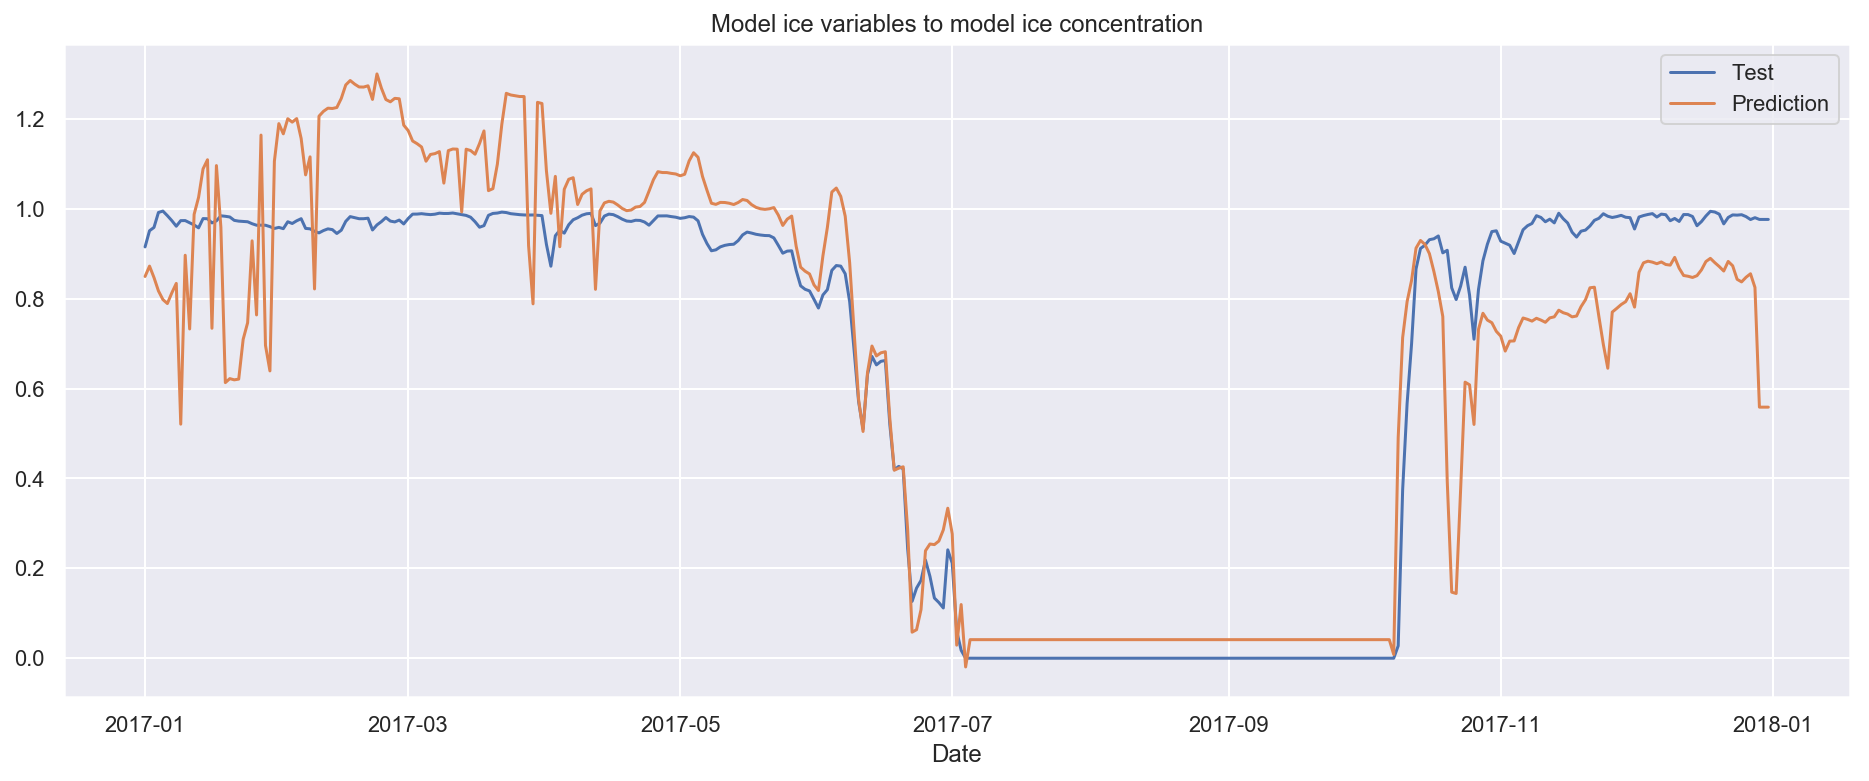

In [5]:
# initialize the regression instance
fitter_model = Fitter(train=ds_train, test = ds_test)

# fit on ice variables
fitter_model.define_target(target_var, ice_var_list)
fitter_model.linear_regression_prediction(normalize=False)
fitter_model.lineplot('Model ice variables to model ice concentration')

here


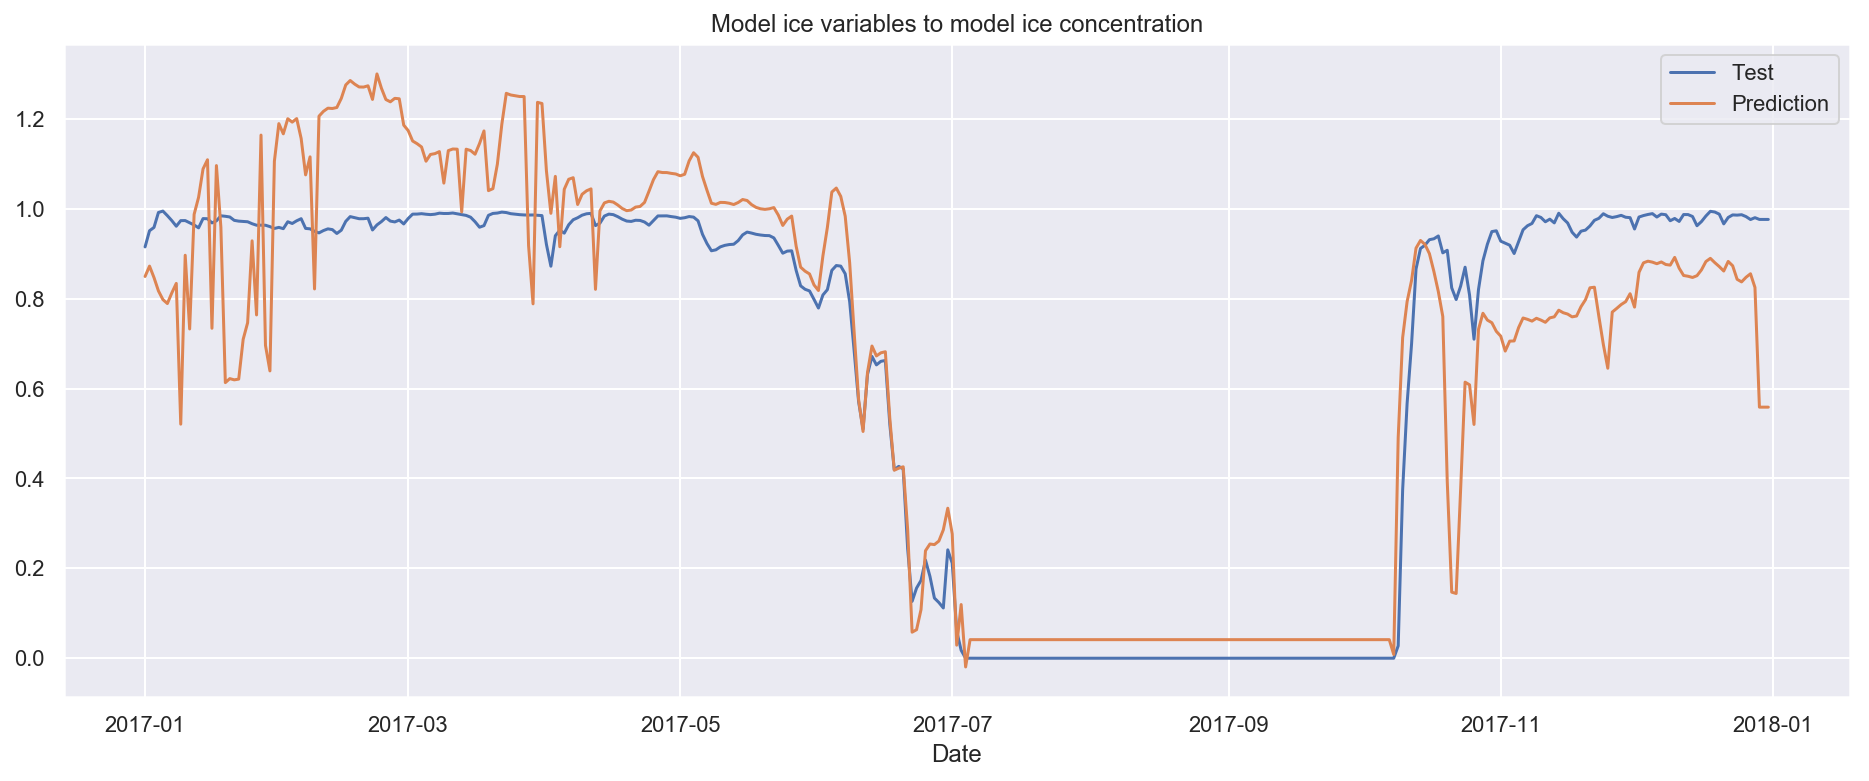

In [6]:
fitter_model.linear_regression_prediction(normalize=True)
fitter_model.lineplot('Model ice variables to model ice concentration')

In [7]:
(1,1)-(0,0)

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'